In [1]:
# Import the libraries
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
import numpy as np

import pandas as pd
import import_ipynb
from cancer_helper import *
from init_data import *

importing Jupyter notebook from cancer_helper.ipynb
importing Jupyter notebook from init_data.ipynb


In [2]:
# Process the CSV data and put it into X as features
np_data = pd.read_csv('UCEC.csv',keep_default_na=False, sep=';',header=None, encoding = "utf-8").values
X, feature_labels, vital_status, death_days_to, outcome = init_data_UCEC(np_data)
num_groups = 5

In [3]:
# actual_labels = []

# compressed_labels = ['histological_grade', 'clinical_stage', 'tumor_grade', 'histological_type']
# compressed_indices = []
# for i in range(len(compressed_labels)):
#     compressed_indices.append([])

# # extract actual labels
# for i in range(len(feature_labels)):  
#     success = False
#     for j in range(len(compressed_labels)):
#         if feature_labels[i].startswith(compressed_labels[j]):
#             compressed_indices[j].append(i)
#             if compressed_labels[j] not in actual_labels:
#                 actual_labels.append(compressed_labels[j])
#             success = True
#             break
#     if not success:
#         actual_labels.append(feature_labels[i])
# compressed_indices.sort(reverse = True)

# weights = list(np.arange(len(feature_labels)))#.astype('double')
# print(compressed_indices)
# print()
# print(weights)
# for i in range(len(compressed_indices)):
#     if compressed_indices[i]:
#         num_elem = len(compressed_indices[i]) 
#         start = compressed_indices[i][0]
#         finish = compressed_indices[i][0] + num_elem
#         weights[start : finish] = [np.mean( weights[start : finish])]
# #         chunk = weights[compressed_indices[i][0] : compressed_indices[i][0] + num_elem]
# #         chunk = np.mean(chunk)
# #         weights[9:21] = np.mean(weights)
# #         weights[compressed_indices[i][0] : compressed_indices[i][0] + num_elem] = [np.mean(compressed_indices[i])]
        
        
        
# #         mean_weight = np.mean(weights[compressed_indices[i]])
# #         weights[compressed_indices[i][0] : compressed_indices[i][0] + num_elem] = [np.mean(compressed_indices[i])]
#         print(weights)
# print(weights)

**Vital status**

In class model:
Average train final cost: nan
Average train accuracy: 35.17 %
Average train F1 score: 0.41
Average test accuracy: 34.38 %
Average test F1 score: 0.38


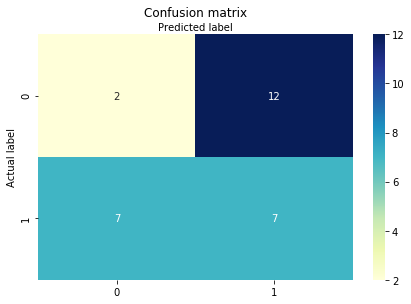


Scikit model:
Average train final cost: 5.95
Average train accuracy: 82.77 %
Average train F1 score: 0.83
Average test final cost: 9.13
Average test accuracy: 73.57 %
Average test F1 score: 0.74
Average Gaussian Naive Bayes accuracy: 73.62 %


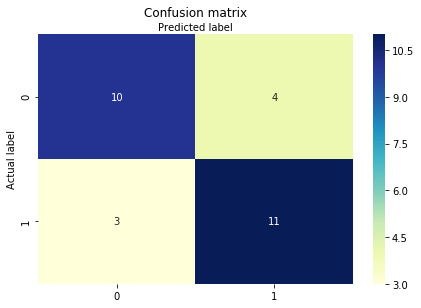


Highest average weights:
tumor_status : 10.58
new_tumor_event_type : 0.38
age : 0.32


In [4]:
y = vital_status
iters = 200 # recommended 40000
alpha = 0.00000001

vital_status_train(X, y, alpha, iters, num_groups, feature_labels)

**Death days to**

In [5]:
dead = np.nonzero(vital_status == 0)[0]
y = death_days_to[dead].astype('int')
X_death = X[dead, :]
iters = 4000
alpha = 0.005

death_days_to_train(X_death, y, alpha, iters, num_groups)

In-class model:
Average final cost: nan
Mean in y: 928.92
Variance in y: 659941.62

Scikit model:
Average train accuracy: 36.18 %
Average test accuracy: 16.19 %


**Outcome**

In class model:
Logistic regression:
Average train final cost: nan
Average train accuracy: 76.25 %
Average train F1 score: 0.76
Average test accuracy: 77.50 %
Average test F1 score: 0.77


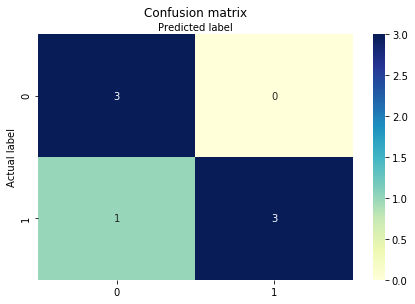


One vs all:
Average train accuracy: 92.50 %
Average train F1 score: 0.93
Average test accuracy: 75.00 %
Average test F1 score: 0.76


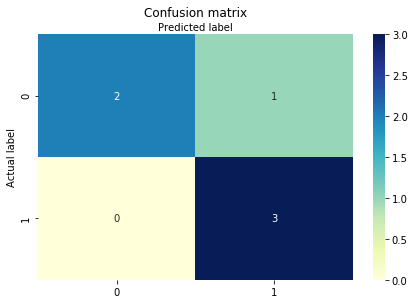


Scikit model:
['1-vector', 'age', 'histological_grade', 'histological_type', 'clinical_stage', 'initial_pathologic_dx_year', 'tumor_status', 'new_tumor_event_type', 'new_tumor_event_dx_days_to'] [-0.016686263627810036, -0.11148710812276452, -0.004171565906953112, -0.005562087875937445, -0.0010428914767383057, 0.0007645349867602834, 7.317416632549074, 4.222516666429514, -0.0015440028784439084]

Average train accuracy: 91.25 %
Average train F1 score: 0.91
Average test accuracy: 77.50 %
Average test F1 score: 0.76


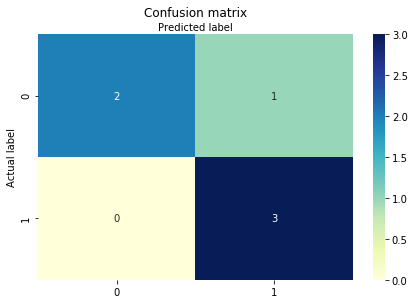


Highest average weights:
tumor_status : 7.32
new_tumor_event_type : 4.22
age : 0.11


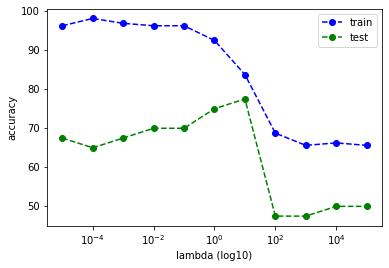

In [6]:
y = outcome
lambda_val = 1
interested_in = [0, 2]

# print_num_samples(y)
outcome_train(X, y, interested_in, lambda_val, num_groups, feature_labels)